In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
image = cv2.imread('./1.jpg')

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


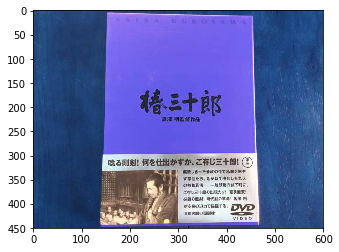

In [140]:
plt.imshow(image)

In [166]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


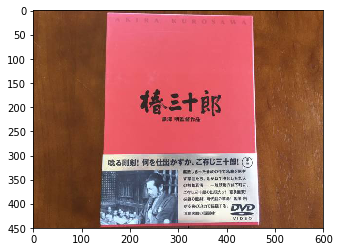

In [167]:
plt.imshow(image_rgb)

In [129]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


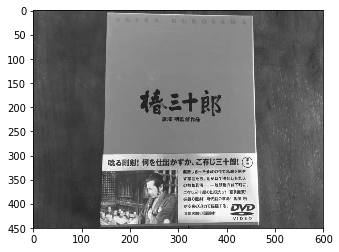

In [130]:
plt.imshow(image_gray, cmap='gray')

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


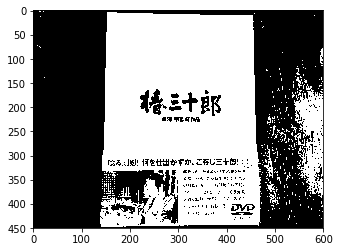

In [131]:
thresh_image = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh_image, cmap='gray')

In [132]:
find_image, contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


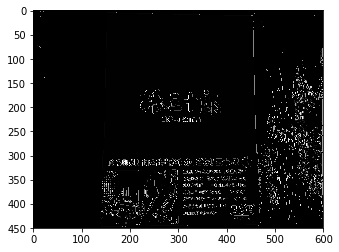

In [133]:
plt.imshow(find_image, cmap='gray')

In [134]:
draw_image = cv2.drawContours(find_image, contours, -1, (0, 0, 255), 3)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


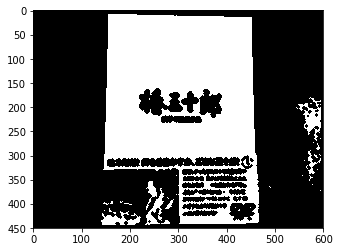

In [135]:
plt.imshow(draw_image, cmap='gray')

In [145]:
draw_image = cv2.drawContours(image_rgb, contours, -1, (0, 255, 0), 3)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


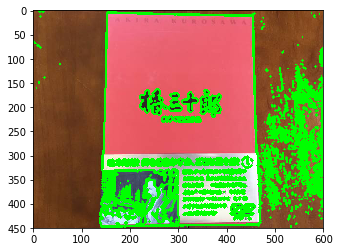

In [146]:
plt.imshow(draw_image)

In [162]:
print(contours[4])

[[[471 434]]]


In [147]:
len(contours)

1443

In [148]:
th_area = image_rgb.shape[0] * image_rgb.shape[1] / 100
contours_large = list(filter(lambda c:cv2.contourArea(c) > th_area, contours))

In [151]:
def getRectByPoints(points):
    # prepare simple array 
    points = list(map(lambda x: x[0], points))

    points = sorted(points, key=lambda x:x[1])
    top_points = sorted(points[:2], key=lambda x:x[0])
    bottom_points = sorted(points[2:4], key=lambda x:x[0])
    points = top_points + bottom_points

    left = min(points[0][0], points[2][0])
    right = max(points[1][0], points[3][0])
    top = min(points[0][1], points[1][1])
    bottom = max(points[2][1], points[3][1])
    return (top, bottom, left, right)

def getPartImageByRect(rect):
    img = cv2.imread('./1.jpg', 1)
    return img[rect[0]:rect[1], rect[2]:rect[3]]

In [168]:
outputs = []
rects = []
approxes = []

for (i,cnt) in enumerate(contours_large):
    arclen = cv2.arcLength(cnt, True)  # 面積の計算
    approx = cv2.approxPolyDP(cnt, 0.02*arclen, True)  # 周囲長を計算（要は多角形の辺の総和）
    # 小さいやつは除外
    if len(approx) < 4:
        continue
    approxes.append(approx)
    x, y, w, h = cv2.boundingRect(cnt)
    outputs.append(cv2.rectangle(image_rgb,(x,y),(x+w,y+h), (0,255,0), 2))

In [173]:
len(outputs)

2

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


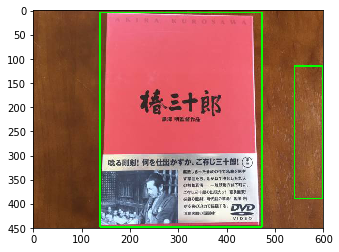

In [171]:
plt.imshow(outputs[0])

In [152]:
outputs = []
rects = []
approxes = []

for (i,cnt) in enumerate(contours_large):
    arclen = cv2.arcLength(cnt, True)  # 面積の計算
    approx = cv2.approxPolyDP(cnt, 0.02*arclen, True)  # 周囲長を計算（要は多角形の辺の総和）
    # 小さいやつは除外
    if len(approx) < 4:
        continue
    approxes.append(approx)
    rect = getRectByPoints(approx)
    rects.append(rect)
    outputs.append(getPartImageByRect(rect))

In [153]:
len(rects)

2

In [154]:
rects[0]

(115, 341, 547, 598)

In [155]:
len(outputs)

2

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


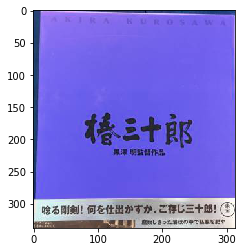

In [157]:
plt.imshow(outputs[1])

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


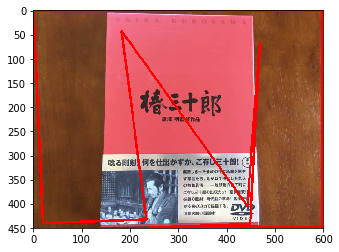

In [105]:
draw_image = cv2.drawContours(image_rgb, approxes, -1, (255, 0, 0), 3)
plt.imshow(draw_image)

In [192]:
image_2 = cv2.imread('./2.jpg')

In [193]:
image_2_gray = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


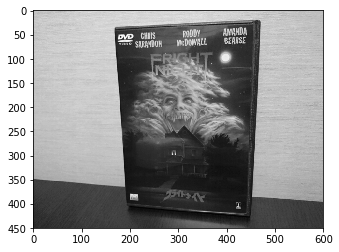

In [194]:
plt.imshow(image_2_gray, cmap='gray')

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


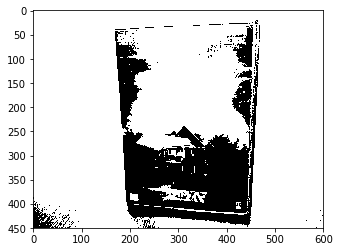

In [177]:
thresh_image = cv2.threshold(image_2_gray, 50, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh_image, cmap='gray')

In [178]:
im2, contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


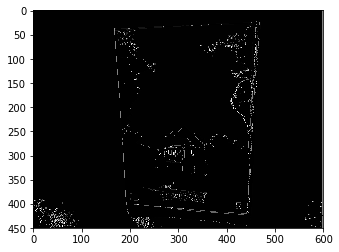

In [179]:
plt.imshow(im2, cmap='gray')

In [195]:
_image_2 = image_2.copy()
draw_image = cv2.drawContours(_image_2, contours, -1, (0, 255, 0), 3)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


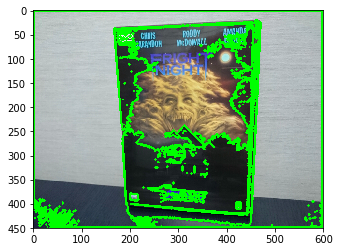

In [196]:
plt.imshow(draw_image, cmap='gray')

In [197]:
image_rgb = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
th_area = image_rgb.shape[0] * image_rgb.shape[1] / 100
contours_large = list(filter(lambda c:cv2.contourArea(c) > th_area, contours))

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


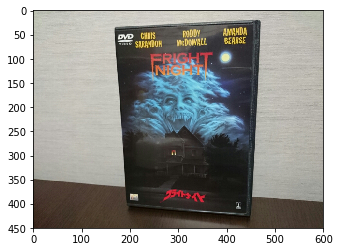

In [198]:
_image_2 = image_2.copy()
image_rgb = cv2.cvtColor(_image_2, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [199]:
outputs = []
rects = []
approxes = []

for (i,cnt) in enumerate(contours_large):
    arclen = cv2.arcLength(cnt, True)  # 面積の計算
    approx = cv2.approxPolyDP(cnt, 0.02*arclen, True)  # 周囲長を計算（要は多角形の辺の総和）
    # 小さいやつは除外
    if len(approx) < 4:
        continue
    approxes.append(approx)
    x, y, w, h = cv2.boundingRect(cnt)
    outputs.append(cv2.rectangle(_image_2,(x,y),(x+w,y+h), (0,255,0), 2))

In [200]:
len(outputs)

1

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


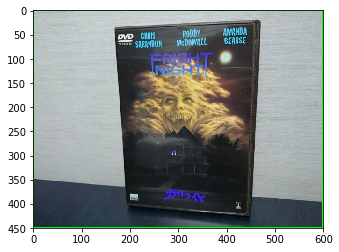

In [201]:
plt.imshow(outputs[0])